In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# path config
parent_dir = os.path.dirname(os.getcwd())
fo = os.path.join(parent_dir, 'data', 'Vie2Image', 'Char')
os.chdir(parent_dir)
print("Updated Working Directory: ", os.getcwd())

Updated Working Directory:  c:\Users\ryoii\Desktop\EEG2IMAGE


In [3]:
from __00_load_csv import load_alphabet
from __01_transform_data import transform_eeg_data, process_band, MA_X, MA_X2
from __02_model import train, visualize
from __03_utils import plot_eeg, downsample, plot_eeg_1280

In [4]:
# load raw data
x, Y = load_alphabet(fo)
X = downsample(x)
print(f'shape of X : {X.shape}')
print(f'shape of Y : {Y.shape}')

Downsampling EEG Data: 100%|██████████| 220/220 [00:00<00:00, 4019.37it/s]

shape of X : (220, 2, 1280)
shape of Y : (220,)


shape of X_new : (34540, 32, 2)
shape of Y_new : (34540,)


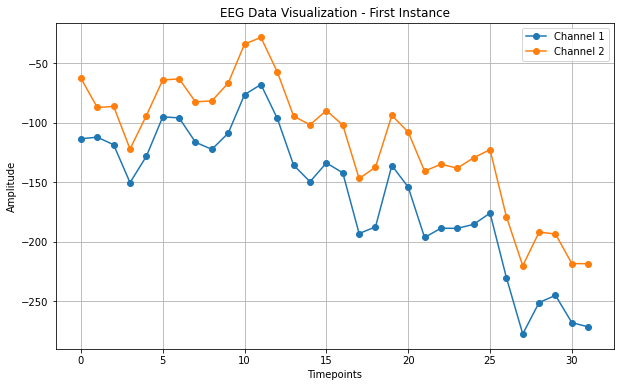

In [5]:
# reshape data
dataset_type = 'alphabet'


X_new, Y_new = transform_eeg_data(X, Y)
print(f'shape of X_new : {X_new.shape}')
print(f'shape of Y_new : {Y_new.shape}')
plot_eeg(X_new)

In [6]:
# RAW data
model = train(X_new, Y_new, dataset_type=dataset_type, epochs=500)
visualize(model, X_new, Y_new, dataset_type=dataset_type)

Epoch 1/500
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1116 - loss: 2.5158
Epoch 1: val_loss improved from inf to 2.30038, saving model to model/two_channel/model_alphabet_FullBand.keras
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.1117 - loss: 2.5146 - val_accuracy: 0.1162 - val_loss: 2.3004
Epoch 2/500
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1257 - loss: 2.3216
Epoch 2: val_loss improved from 2.30038 to 2.28522, saving model to model/two_channel/model_alphabet_FullBand.keras
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.1257 - loss: 2.3215 - val_accuracy: 0.1462 - val_loss: 2.2852
Epoch 3/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1301 - loss: 2.2921
Epoch 3: val_loss did not improve from 2.28522
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.1301 - loss: 2.2921 - val_accuracy: 0.1290 - val_loss: 2.2901
Epoch 4/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1349 - loss: 2.2826
Epoch 4: val_los

TypeError: visualize() missing 1 required positional argument: 'selected_channels'

In [8]:
Y_new

array([0., 0., 0., ..., 9., 9., 9.])

In [ ]:
# # #  Moving Average filter
# X_filtered = MA_X(X_new, axis=1, M=3)


# model = train(X_filtered, Y_new, dataset_type=dataset_type, epochs=500)

In [ ]:
# # #  Moving Average filter
# X_filtered = MA_X2(X_new, axis=1, M=3)


# model = train(X_filtered, Y_new, dataset_type=dataset_type, epochs=500)